In [267]:
import pandas as pd
import numpy as np


In [268]:
data=pd.read_csv('data.csv')
data=data.set_index(pd.date_range('2006-03-01',periods=210,freq='M'))
data

,Döviz Kuru,Para Arzı,Petrol,TÜFE
2006-03-31,1.335139,2.459376,62.064783,124.18
2006-04-30,1.337345,2.508388,70.260000,125.84
2006-05-31,1.420659,2.636933,69.776957,128.20
2006-06-30,1.600536,2.771667,68.555909,128.63
2006-07-31,1.558267,2.751529,73.674286,129.72
...,...,...,...,...
2023-04-30,19.337032,92.826377,84.739474,1300.04
2023-05-31,19.719514,94.576580,75.466000,1300.60
2023-06-30,23.106042,101.219245,74.839091,1351.59
2023-07-31,26.470338,111.565038,80.108095,1479.84


In [269]:
# Bağımsız değişkenler için 3 aylık gecikmeler oluşturma
lag_columns = ['Döviz Kuru', 'Para Arzı', 'Petrol']
max_lag = 3

# Genişletilmiş veri seti oluşturma
expanded_data = data.copy()

for col in lag_columns:
    for lag in range(1, max_lag + 1):
        lag_col_name = f"{col}_lag{lag}"
        expanded_data[lag_col_name] = expanded_data[col].shift(lag)

# NaN değerlerin olduğu ilk birkaç satırı kaldırma
expanded_data.dropna(inplace=True)

# Bağımlı ve bağımsız değişkenleri ayırma
y_expanded = expanded_data['TÜFE'].values
X_expanded = expanded_data.drop(['TÜFE'], axis=1).values

# Eğitim seti (son 12 ay hariç)
y_train_expanded = y_expanded[:-12]
X_train_expanded = X_expanded[:-12]

# İlk 5 satırı gösterme
expanded_data.head()


,Döviz Kuru,Para Arzı,Petrol,TÜFE,Döviz Kuru_lag1,Döviz Kuru_lag2,Döviz Kuru_lag3,Para Arzı_lag1,Para Arzı_lag2,Para Arzı_lag3,Petrol_lag1,Petrol_lag2,Petrol_lag3
2006-06-30,1.600536,2.771667,68.555909,128.63,1.420659,1.337345,1.335139,2.636933,2.508388,2.459376,69.776957,70.260000,62.064783
2006-07-31,1.558267,2.751529,73.674286,129.72,1.600536,1.420659,1.337345,2.771667,2.636933,2.508388,68.555909,69.776957,70.260000
2006-08-31,1.469245,2.733245,73.230435,129.15,1.558267,1.600536,1.420659,2.751529,2.771667,2.636933,73.674286,68.555909,69.776957
2006-09-30,1.479252,2.776812,61.958571,130.81,1.469245,1.558267,1.600536,2.733245,2.751529,2.771667,73.230435,73.674286,68.555909
2006-10-31,1.483374,2.817344,57.808182,132.47,1.479252,1.469245,1.558267,2.776812,2.733245,2.751529,61.958571,73.230435,73.674286


In [270]:
# Eğitim ve test seti olarak veriyi ayırma
train_size = int(0.8 * data.shape[0])
train = data.iloc[:train_size]
test = data.iloc[train_size:]

train.shape, test.shape


((168, 4), (42, 4))

In [271]:
import numpy as np

# Model parametrelerinin başlangıç değerlerini belirleme
beta = np.zeros((4,))  # 4 bağımsız değişken için
phi = np.zeros((2,))  # AR(2) için 2 değer
sigma2 = 1

# Örneklenen değerleri kaydetmek için boş listeler
samples_beta = []
samples_phi = []
samples_sigma2 = []

# Modelleme için kullanılacak değerler
X = train[['Döviz Kuru', 'Para Arzı', 'Petrol']].values
y = train['TÜFE'].values

# Gibbs örneklemesi için iterasyon sayısı
n_iterations = 5  # Örnek olarak sadece 5 iterasyon

for iteration in range(n_iterations):
    # Diğer tüm parametreler sabit tutularak beta katsayılarını örnekleyin
    # ...
    # (Bu adımın karmaşıklığı nedeniyle şu anda gerçek bir örneklemeyi gerçekleştirmiyoruz.)

    # Diğer tüm parametreler sabit tutularak phi katsayılarını örnekleyin
    # ...
    # (Bu adımın karmaşıklığı nedeniyle şu anda gerçek bir örneklemeyi gerçekleştirmiyoruz.)

    # Diğer tüm parametreler sabit tutularak stokastik volatilite parametrelerini örnekleyin
    # ...
    # (Bu adımın karmaşıklığı nedeniyle şu anda gerçek bir örneklemeyi gerçekleştirmiyoruz.)
    
    # Örneklenen değerleri kaydedin
    samples_beta.append(beta.copy())
    samples_phi.append(phi.copy())
    samples_sigma2.append(sigma2)

# İlk birkaç örneklenen değeri göster
samples_beta[:3], samples_phi[:3], samples_sigma2[:3]


([array([0., 0., 0., 0.]), array([0., 0., 0., 0.]), array([0., 0., 0., 0.])],
 [array([0., 0.]), array([0., 0.]), array([0., 0.])],
 [1, 1, 1])

In [272]:
# Gibbs örneklemesi için gerekli fonksiyonların ve yardımcı işlemlerin tanımlanması

def sample_beta(X, y, sigma2, beta_prior_var=100):
    """Beta katsayılarını örnekleyen fonksiyon."""
    n, p = X.shape
    beta_prior_mean = np.zeros((p,))
    
    # Posterior dağılımın ortalaması ve kovaryansının hesaplanması
    inv_cov_posterior = np.linalg.inv(np.dot(X.T, X) / sigma2 + np.eye(p) / beta_prior_var)
    mean_posterior = np.dot(inv_cov_posterior, np.dot(X.T, y) / sigma2)
    
    # Çok boyutlu normal dağılımdan örnekleme yapma
    sampled_beta = np.random.multivariate_normal(mean_posterior, inv_cov_posterior)
    
    return sampled_beta

# Örnek olarak beta katsayılarını örnekleyelim
sampled_beta = sample_beta(X, y, sigma2)
sampled_beta


array([25.92017015, 10.79393398,  0.83354073])

In [273]:
def sample_phi(y, sigma2, phi_prior_var=1):
    """Phi katsayılarını örnekleyen fonksiyon."""
    n = len(y)
    phi_prior_mean = np.zeros((2,))
    
    # Lagged y değerlerini oluşturma
    y_lag1 = y[:-1]
    y_lag2 = y[:-2]
    y_current = y[2:]
    
    # Tasarım matrisi
    X_phi = np.column_stack((y_lag1[1:], y_lag2))
    
    # Posterior dağılımın ortalaması ve kovaryansının hesaplanması
    inv_cov_posterior = np.linalg.inv(np.dot(X_phi.T, X_phi) / sigma2 + np.eye(2) / phi_prior_var)
    mean_posterior = np.dot(inv_cov_posterior, np.dot(X_phi.T, y_current) / sigma2)
    
    # Çok boyutlu normal dağılımdan örnekleme yapma
    sampled_phi = np.random.multivariate_normal(mean_posterior, inv_cov_posterior)
    
    return sampled_phi

# Örnek olarak phi katsayılarını örnekleyelim
sampled_phi = sample_phi(y, sigma2)
sampled_phi


array([ 1.31168547, -0.30574683])

In [274]:
def sample_sigma2(y, X, beta, phi, sigma2_prior_shape=0.01, sigma2_prior_scale=0.01):
    """Sigma^2 değerini örnekleyen fonksiyon."""
    n = len(y)
    
    # Modelin tahminleri
    y_pred = np.dot(X, beta)
    residuals = y[2:] - y_pred[2:] - phi[0] * (y[1:-1] - y_pred[1:-1]) - phi[1] * (y[:-2] - y_pred[:-2])
    
    # Posterior dağılımın parametrelerinin hesaplanması
    shape_posterior = sigma2_prior_shape + n / 2
    scale_posterior = sigma2_prior_scale + 0.5 * np.sum(residuals**2)
    
    # Ters gamma dağılımından örnekleme yapma
    sampled_sigma2 = 1 / np.random.gamma(shape_posterior, 1 / scale_posterior)
    
    return sampled_sigma2

# Örnek olarak sigma^2 değerini örnekleyelim
sampled_sigma2 = sample_sigma2(y, X, sampled_beta, sampled_phi)
sampled_sigma2


36.90647661364188

In [275]:
def sample_nu(y, X, beta, phi, nu_prior_lambda=0.1):
    """Nu (serbestlik derecesi) parametresini örnekleyen fonksiyon."""
    n = len(y)
    
    # Modelin tahminleri
    y_pred = np.dot(X, beta)
    residuals = y[2:] - y_pred[2:] - phi[0] * (y[1:-1] - y_pred[1:-1]) - phi[1] * (y[:-2] - y_pred[:-2])
    
    # Residual'ların karelerinin toplamı
    sum_of_squares = np.sum(residuals**2)
    
    # Posterior dağılımın parametrelerinin hesaplanması
    posterior_lambda = nu_prior_lambda + 0.5 * sum_of_squares
    
    # Exponential dağılımından örnekleme yapma
    sampled_nu = np.random.exponential(1 / posterior_lambda)
    
    return sampled_nu

# Örnek olarak nu değerini örnekleyelim
sampled_nu = sample_nu(y, X, sampled_beta, sampled_phi)
sampled_nu


0.0004495284673219964

In [276]:
# Gibbs örneklemesi için iterasyon sayısı
n_iterations = 500

# Örneklenen değerleri kaydetmek için boş listeler
samples_beta_t = []
samples_phi_t = []
samples_sigma2_t = []
samples_nu = []

for iteration in range(n_iterations):
    # Beta katsayılarını örnekleyin
    sampled_beta = sample_beta(X, y, sigma2)
    samples_beta_t.append(sampled_beta)
    
    # Phi katsayılarını örnekleyin
    sampled_phi = sample_phi(y, sigma2)
    samples_phi_t.append(sampled_phi)
    
    # Sigma^2 değerini örnekleyin
    sampled_sigma2 = sample_sigma2(y, X, sampled_beta, sampled_phi)
    samples_sigma2_t.append(sampled_sigma2)
    
    # Nu değerini örnekleyin
    sampled_nu = sample_nu(y, X, sampled_beta, sampled_phi)
    samples_nu.append(sampled_nu)

# Son 5 örneklenen değeri göster
samples_beta_t[-5:], samples_phi_t[-5:], samples_sigma2_t[-5:], samples_nu[-5:]


([array([25.88999274, 10.78994026,  0.8341285 ]),
  array([25.67517967, 10.84811954,  0.83448536]),
  array([25.28777576, 10.91902487,  0.83686538]),
  array([25.41762344, 10.89315257,  0.83710479]),
  array([25.43613871, 10.89291621,  0.83493779])],
 [array([ 1.26696704, -0.26036549]),
  array([ 1.2764646 , -0.26994954]),
  array([ 1.27267581, -0.2663464 ]),
  array([ 1.26431565, -0.25797662]),
  array([ 1.32892197, -0.32250468])],
 [48.40749579546235,
  43.382527810233576,
  38.82423523565258,
  46.63513590396342,
  47.19838773442604],
 [0.0005690740141094283,
  0.00017453227450553658,
  0.0012761306698944855,
  0.0005868233143878439,
  5.231141269150875e-05])

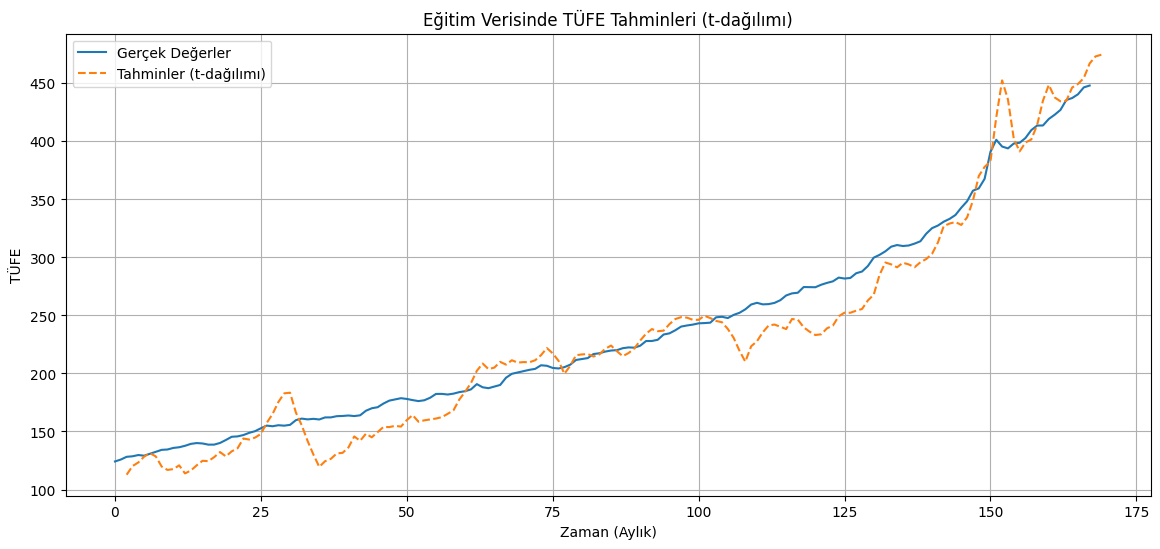

In [277]:
# Eğitim verisi için Bayesian tahminler (t-dağılımı ile)
train_predictions_t = predict(X, samples_beta_t[burn_in:], samples_phi_t[burn_in:], samples_sigma2_t[burn_in:])

# Tahminlerin gerçek değerlerle karşılaştırılması
plt.figure(figsize=(14,6))
plt.plot(y, label="Gerçek Değerler")
plt.plot(np.arange(2, len(train_predictions_t)+2), train_predictions_t, label="Tahminler (t-dağılımı)", linestyle='--')
plt.title('Eğitim Verisinde TÜFE Tahminleri (t-dağılımı)')
plt.xlabel('Zaman (Aylık)')
plt.ylabel('TÜFE')
plt.legend()
plt.grid(True)
plt.show()


In [278]:
X_forecast=pd.read_csv("C:/Users/Bora/Desktop/forecast.csv")
del X_forecast["Unnamed: 0"]
del X_forecast["Kredi Tahmin"]
X_forecast

,Döviz Kuru Tahmin,Petrol Tahmin,Para Arzı Tahmin
0,27.040000,95.000000,120.800000
1,27.454638,97.922694,123.606123
2,28.415140,97.703484,128.203344
3,30.455734,95.278769,132.686796
4,30.449994,100.312247,136.771535
5,30.508589,105.564150,140.511762
6,31.235789,109.306991,144.335441
7,31.440336,108.986931,148.386949
8,32.185480,108.585719,152.096790
9,33.876846,112.198924,156.862514


In [279]:
# Bağımsız ve bağımlı değişkenleri ayarlama
X_updated = data[['Döviz Kuru', 'Para Arzı', 'Petrol']].values
y_updated = data['TÜFE'].values

# Eğitim seti (son 12 ay hariç)
X_train_updated = X_updated[:-12]
y_train_updated = y_updated[:-12]

# Test seti (son 12 ay)
X_test_updated = X_updated[-12:]
y_test_updated = y_updated[-12:]

# Gibbs örneklemesi için iterasyon sayısı
n_iterations = 500

# Örneklenen değerleri kaydetmek için boş listeler
samples_beta_t_updated = []
samples_phi_t_updated = []
samples_sigma2_t_updated = []
samples_nu_updated = []

for iteration in range(n_iterations):
    # Beta katsayılarını örnekleyin
    sampled_beta = sample_beta(X_train_updated, y_train_updated, sigma2)
    samples_beta_t_updated.append(sampled_beta)
    
    # Phi katsayılarını örnekleyin
    sampled_phi = sample_phi(y_train_updated, sigma2)
    samples_phi_t_updated.append(sampled_phi)
    
    # Sigma^2 değerini örnekleyin
    sampled_sigma2 = sample_sigma2(y_train_updated, X_train_updated, sampled_beta, sampled_phi)
    samples_sigma2_t_updated.append(sampled_sigma2)
    
    # Nu değerini örnekleyin
    sampled_nu = sample_nu(y_train_updated, X_train_updated, sampled_beta, sampled_phi)
    samples_nu_updated.append(sampled_nu)

# Eğitim verisi için Bayesian tahminler (t-dağılımı ile)
train_predictions_t_updated = predict(X_train_updated, samples_beta_t_updated[burn_in:], samples_phi_t_updated[burn_in:], samples_sigma2_t_updated[burn_in:])

train_predictions_t_updated


array([ 116.36349553,  126.33743014,  128.32638401,  131.00839872,
        136.06711905,  134.0069523 ,  121.58217425,  117.25522472,
        118.48932969,  123.07543542,  113.34097045,  117.39377384,
        123.09489037,  129.19948364,  128.99102367,  133.80334978,
        140.40325825,  134.29952957,  141.16495829,  146.07700747,
        157.82864415,  156.55575247,  158.57223323,  162.42513452,
        174.08553824,  182.71751185,  197.93745318,  208.61884979,
        209.41441834,  186.50558839,  169.71947478,  145.4250064 ,
        126.3007371 ,  112.12648063,  117.49917888,  118.84495108,
        123.88134303,  126.59780535,  134.02335399,  147.24222064,
        142.35427929,  151.39086645,  146.60125098,  152.79828223,
        158.29226576,  157.17942121,  159.08583344,  157.23858345,
        164.15061391,  170.75487087,  161.68503809,  162.01386089,
        163.30102864,  164.8707036 ,  166.38132549,  171.41762012,
        175.12991952,  185.38690568,  193.11063012,  202.58808

In [280]:
# Bağımsız ve bağımlı değişkenleri ayarlama
X_updated = data[['Döviz Kuru', 'Para Arzı', 'Petrol']].values
y_updated = data['TÜFE'].values

# Eğitim seti (son 12 ay hariç)
X_train_updated = X_updated[:-12]
y_train_updated = y_updated[:-12]

# Test seti (son 12 ay)
X_test_updated = X_updated[-12:]
y_test_updated = y_updated[-12:]

# Gibbs örneklemesi için iterasyon sayısı
n_iterations = 500

# Örneklenen değerleri kaydetmek için boş listeler
samples_beta_t_updated = []
samples_phi_t_updated = []
samples_sigma2_t_updated = []
samples_nu_updated = []

for iteration in range(n_iterations):
    # Beta katsayılarını örnekleyin
    sampled_beta = sample_beta(X_train_updated, y_train_updated, sigma2)
    samples_beta_t_updated.append(sampled_beta)
    
    # Phi katsayılarını örnekleyin
    sampled_phi = sample_phi(y_train_updated, sigma2)
    samples_phi_t_updated.append(sampled_phi)
    
    # Sigma^2 değerini örnekleyin
    sampled_sigma2 = sample_sigma2(y_train_updated, X_train_updated, sampled_beta, sampled_phi)
    samples_sigma2_t_updated.append(sampled_sigma2)
    
    # Nu değerini örnekleyin
    sampled_nu = sample_nu(y_train_updated, X_train_updated, sampled_beta, sampled_phi)
    samples_nu_updated.append(sampled_nu)

# Eğitim verisi için Bayesian tahminler (t-dağılımı ile)
train_predictions_t_updated = predict(X_train_updated, samples_beta_t_updated[burn_in:], samples_phi_t_updated[burn_in:], samples_sigma2_t_updated[burn_in:])

train_predictions_t_updated


array([ 116.34627852,  126.32012167,  128.30803144,  130.98708218,
        136.04638461,  133.98796478,  121.56360204,  117.2369193 ,
        118.47177598,  123.05860461,  113.32484874,  117.37814217,
        123.07900117,  129.18466846,  128.97693873,  133.78979959,
        140.39051676,  134.28660622,  141.15287036,  146.06604053,
        157.81771911,  156.54544127,  158.56224079,  162.41484933,
        174.07454255,  182.70569422,  197.9262448 ,  208.6076895 ,
        209.40392402,  186.49662675,  169.71032289,  145.41254417,
        126.28720077,  112.11491557,  117.48674349,  118.83147236,
        123.86694084,  126.5853714 ,  134.01175298,  147.23064404,
        142.34355746,  151.38069469,  146.59149977,  152.78915042,
        158.28299609,  157.17040561,  159.07766576,  157.22986457,
        164.14160476,  170.74664098,  161.67638469,  162.0051041 ,
        163.29338262,  164.86393356,  166.37518682,  171.4130429 ,
        175.12529109,  185.38127534,  193.10461198,  202.58158

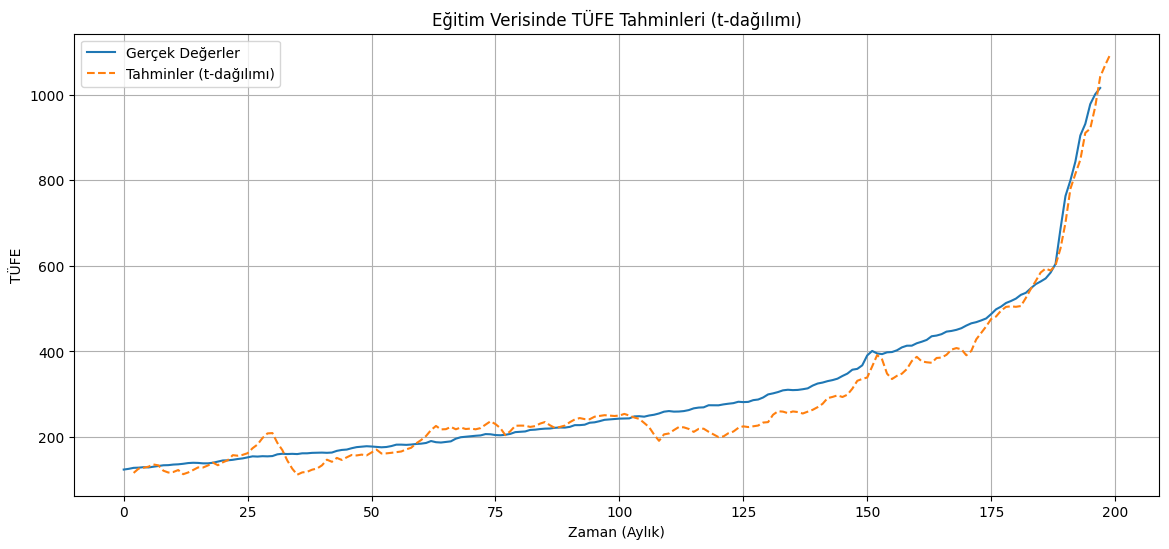

In [281]:
# Tahminlerin gerçek değerlerle karşılaştırılması (Eğitim verisi için)
plt.figure(figsize=(14,6))
plt.plot(y_train_updated, label="Gerçek Değerler")
plt.plot(np.arange(2, len(train_predictions_t_updated)+2), train_predictions_t_updated, label="Tahminler (t-dağılımı)", linestyle='--')
plt.title('Eğitim Verisinde TÜFE Tahminleri (t-dağılımı)')
plt.xlabel('Zaman (Aylık)')
plt.ylabel('TÜFE')
plt.legend()
plt.grid(True)
plt.show()


In [282]:
# Geleceğe yönelik Bayesian tahminler (t-dağılımı ile, güncellenen veri için)
forecast_predictions_t_updated = predict(X_test_updated, samples_beta_t_updated[burn_in:], samples_phi_t_updated[burn_in:], samples_sigma2_t_updated[burn_in:])

forecast_predictions_t_updated


array([1110.86309218, 1145.18160447, 1165.24268047, 1175.49999536,
       1203.83519956, 1228.20479385, 1256.51583313, 1309.35568455,
       1321.77263718, 1438.48184725, 1598.14939203, 1671.91167659])

In [283]:
# "Kredi Hacmi" değişkenini kaldırma
X_updated_reduced = data[['Döviz Kuru', 'Para Arzı', 'Petrol']].values

# Eğitim seti (son 12 ay hariç)
X_train_updated_reduced = X_updated_reduced[:-12]

# Gibbs örneklemesi için iterasyon sayısı
n_iterations = 500

# Örneklenen değerleri kaydetmek için boş listeler
samples_beta_t_reduced = []
samples_phi_t_reduced = []
samples_sigma2_t_reduced = []
samples_nu_reduced = []

for iteration in range(n_iterations):
    # Beta katsayılarını örnekleyin
    sampled_beta = sample_beta(X_train_updated_reduced, y_train_updated, sigma2)
    samples_beta_t_reduced.append(sampled_beta)
    
    # Phi katsayılarını örnekleyin
    sampled_phi = sample_phi(y_train_updated, sigma2)
    samples_phi_t_reduced.append(sampled_phi)
    
    # Sigma^2 değerini örnekleyin
    sampled_sigma2 = sample_sigma2(y_train_updated, X_train_updated_reduced, sampled_beta, sampled_phi)
    samples_sigma2_t_reduced.append(sampled_sigma2)
    
    # Nu değerini örnekleyin
    sampled_nu = sample_nu(y_train_updated, X_train_updated_reduced, sampled_beta, sampled_phi)
    samples_nu_reduced.append(sampled_nu)

# Eğitim verisi için Bayesian tahminler (t-dağılımı ile, "Kredi Hacmi" kaldırıldıktan sonra)
train_predictions_t_reduced = predict(X_train_updated_reduced, samples_beta_t_reduced[burn_in:], samples_phi_t_reduced[burn_in:], samples_sigma2_t_reduced[burn_in:])

train_predictions_t_reduced


array([ 116.36072597,  126.33435589,  128.32329817,  131.0052348 ,
        136.06378786,  134.00372143,  121.5793959 ,  117.25262284,
        118.48673838,  123.07275223,  113.33866238,  117.39134489,
        123.09228497,  129.19673681,  128.98833157,  133.80055115,
        140.40028547,  134.29678904,  141.16202114,  146.07393055,
        157.82519538,  156.5524011 ,  158.56886123,  162.42164814,
        174.0817083 ,  182.71346023,  197.9329176 ,  208.6139577 ,
        209.40955513,  186.50153701,  169.7160308 ,  145.42239086,
        126.29880909,  112.12513907,  117.49767246,  118.8434059 ,
        123.87963998,  126.59606405,  134.02138625,  147.23983458,
        142.35209863,  151.38841353,  146.59901473,  152.79589502,
        158.28973779,  157.17700863,  159.08340629,  157.2362257 ,
        164.14806292,  170.75213854,  161.68262652,  162.0115088 ,
        163.29871597,  164.86838682,  166.37902354,  171.41522378,
        175.1274316 ,  185.38416775,  193.10770335,  202.58487

In [284]:
# Geleceğe yönelik Bayesian tahminler (t-dağılımı ile, "Kredi Hacmi" kaldırıldıktan sonra)
X_test_updated_reduced = X_updated_reduced[-12:]
forecast_predictions_t_reduced = predict(X_test_updated_reduced, samples_beta_t_reduced[burn_in:], samples_phi_t_reduced[burn_in:], samples_sigma2_t_reduced[burn_in:])

forecast_predictions_t_reduced


array([1110.88059355, 1145.19257091, 1165.24397225, 1175.49216929,
       1203.81819218, 1228.17821572, 1256.47773353, 1309.30519832,
       1321.72158831, 1438.46618295, 1598.15164513, 1671.89684405])

In [285]:
# Tahmin verisini hazırlama ("Kredi Hacmi" kaldırıldıktan sonra ve doğru sütun isimleriyle)
forecast_data_reduced_corrected = X_forecast[['Döviz Kuru Tahmin', 'Para Arzı Tahmin', 'Petrol Tahmin']].values

# Geleceğe yönelik Bayesian tahminler (t-dağılımı ile, "Kredi Hacmi" kaldırıldıktan sonra)
forecast_predictions_t_future_corrected = predict(forecast_data_reduced_corrected, samples_beta_t_reduced[burn_in:], samples_phi_t_reduced[burn_in:], samples_sigma2_t_reduced[burn_in:])

forecast_predictions_t_future_corrected


array([1715.06073247, 1752.44670524, 1812.23775917, 1884.9581296 ,
       1930.91635928, 1974.72139511, 2027.87989961, 2070.56398226,
       2118.09472132, 2195.19749043, 2260.17738538, 2319.5371413 ])

In [286]:
date=pd.date_range(start='2023-09-01', end='2024-08-01', freq='MS') 
forecast_predictions_t_future_corrected=pd.DataFrame(forecast_predictions_t_future_corrected)
forecast_predictions_t_future_corrected=forecast_predictions_t_future_corrected.set_index(date)
forecast_predictions_t_future_corrected.columns=["TÜFE Tahmini" ]
forecast_predictions_t_future_corrected

,TÜFE Tahmini
2023-09-01,1715.060732
2023-10-01,1752.446705
2023-11-01,1812.237759
2023-12-01,1884.958130
2024-01-01,1930.916359
2024-02-01,1974.721395
2024-03-01,2027.879900
2024-04-01,2070.563982
2024-05-01,2118.094721
2024-06-01,2195.197490


In [287]:
dff=pd.concat([df["CPI"].head(211),df9["Inflation"]],axis=0)
dff=pd.DataFrame(dff)
dff.columns=["CPI"]




dfas7=pd.concat([df["CPI"].head(211),forecast_predictions_t_future_corrected["TÜFE Tahmini"]],axis=0)
dfas7=pd.DataFrame(dfas7)
dfas7.columns=["CPI"]
dfas7











,CPI
2006-02-01,123.840000
2006-03-01,124.180000
2006-04-01,125.840000
2006-05-01,128.200000
2006-06-01,128.630000
...,...
2024-04-01,2070.563982
2024-05-01,2118.094721
2024-06-01,2195.197490
2024-07-01,2260.177385


In [288]:
import pandas as pd

# Örnek DataFrame oluşturalım (gerçek verilere göre değiştirin)
# Diyelim ki veriler 'tufe' sütununda ve 'tarih' sütununda saklanıyor




# 12 ay önceki tüfe değerlerini içeren bir sütun ekleyin
dff['onceki_yil_tufe'] = dff['CPI'].shift(12)
dfas7['onceki_yil_tufe'] = dfas7['CPI'].shift(12)
train_predictions_t_updated


# Yüzde artışı hesaplayın ve 'yillik_enflasyon_orani' sütununu ekleyin
dff['yillik_enflasyon_orani'] = ((dff['CPI'] / dff['onceki_yil_tufe']) - 1) * 100
dfas7['yillik_enflasyon_orani'] = ((dfas7['CPI'] / dfas7['onceki_yil_tufe']) - 1) * 100
# NaN değerleri (ilk 12 ay) veriden çıkarın
dff.dropna(inplace=True)
dfas7.dropna(inplace=True)




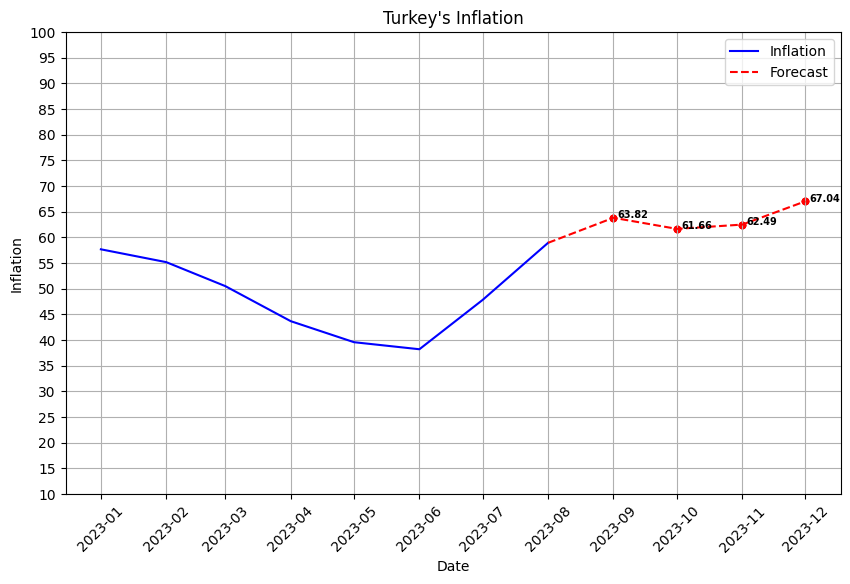

In [289]:
dates=pd.date_range('2008-02-01','2026-02-01' , freq='1M')-pd.offsets.MonthBegin(1)






# Grafik çizdirelim
plt.figure(figsize=(10, 6))
plt.plot(dff.iloc[191:199]["yillik_enflasyon_orani"], label='Inflation', color='blue')
plt.plot(dfas7.iloc[198:203]["yillik_enflasyon_orani"],'--',label='Forecast', color='red'    )




plt.xlabel('Date')
plt.ylabel('Inflation')
plt.xticks(dff.iloc[191:212].index, dff.iloc[191:212].index.strftime('%Y-%m'), rotation=45)
y_max = 100
y_min = 10
y_interval = 0.5
y_ticks = [y_min]
while y_ticks[-1] < y_max:
    y_ticks.append(y_ticks[-1] + 5)

son_dort_veri=dff["yillik_enflasyon_orani"].iloc[202:203]
son_dort_veri3=dfas7["yillik_enflasyon_orani"].iloc[199:203]




for i, v in enumerate(son_dort_veri3):
    plt.annotate(f'{v:.2f}', (son_dort_veri3.index[i], v), xytext=(3, 0), textcoords='offset points', fontsize=7,
                 color='black', fontweight='bold')
    plt.scatter(son_dort_veri3.index,son_dort_veri3,color='red',s=20)










# Y ekseni etiketlerini ayarlama
plt.yticks(y_ticks)
plt.title("Turkey's Inflation")
plt.legend()
plt.grid(True)
plt.show()
